## Finding out APMC and commodities with highest fluctuations now (Year first)

In [20]:
#importing modules
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

#Reading the data
monthly_data = pd.read_csv("/Users/gautamchauhan21/social cops/Analysis-of-Agricultural-data/monthly_data_2.csv")
mandi_data = pd.read_csv("/Users/gautamchauhan21/social cops/Analysis-of-Agricultural-data/mandi_data_1.csv")

In [21]:
#Finding by year first
monthly_data.reset_index(drop=True,inplace=True)

data_14 = monthly_data.loc[monthly_data["Year"]==2014]
data_15 = monthly_data.loc[monthly_data["Year"]==2015]
data_16 = monthly_data.loc[monthly_data["Year"]==2016]

In [22]:
def fluctuation(df):
    df['diff']=df['max_price']-df['min_price']
    highest = df.sort_values('diff', ascending=False).drop_duplicates(['joined'])
    highest.reset_index(drop=True,inplace=True)
    highest=highest.head(10)
    apmc_comm = list(highest.joined)
    return highest,apmc_comm

highest_14,joined_14 = fluctuation(data_14)
highest_15,joined_15 = fluctuation(data_15)
highest_16,joined_16 = fluctuation(data_16)

In [23]:
print("Thus, following APMC and Commodity combination had the highest fluctuation in 2014:\n\n",joined_14)
# Finding unique values!
common = list(set(joined_14).intersection(joined_15))
common = list(set(common).intersection(joined_16))

Thus, following APMC and Commodity combination had the highest fluctuation in 2014:

 ['pomegranate_indapur', 'pomegranate_solapur', 'pomegranate_pimpalgaon basawant', 'lemon_solapur', 'chillies(red)_mumbai', 'brinjal_mangalwedha', 'pomegranate_pandharpur', 'turmeric_sangali', 'pomegranate_jalgaon', 'pomegranate_sangola']


In [24]:
print("Following show highest fluctuations consistently for 3 years:\n\n",common)

Following show highest fluctuations consistently for 3 years:

 ['pomegranate_pimpalgaon basawant', 'chillies(red)_mumbai', 'pomegranate_indapur', 'pomegranate_solapur']


In [25]:
#Plotting the above APMC Commodity combinations

t1 = monthly_data[monthly_data.joined==common[0]]
t1['diff']=t1['max_price']-t1['min_price']
t2 = monthly_data[monthly_data.joined==common[1]]
t2['diff']=t2['max_price']-t2['min_price']
t3 = monthly_data[monthly_data.joined==common[2]]
t3['diff']=t3['max_price']-t3['min_price']
t4 = monthly_data[monthly_data.joined==common[3]]
t4['diff']=t4['max_price']-t4['min_price']

trace01 = go.Scatter(
    x=t1.date,
    y=t1['diff'],
    name = common[0],
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace02 = go.Scatter(
    x=t2.date,
    y=t2['diff'],
    name = common[1],
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)
                
trace03 = go.Scatter(
    x=t3.date,
    y=t3['diff'],
    name = common[2],
    line = dict(color = '#00FF00'),
    opacity = 0.8)

trace04 = go.Scatter(
    x=t4.date,
    y=t4['diff'],
    name = common[3],
    line = dict(color = '#008080'),
    opacity = 0.8)                  

                  
data = [trace01,trace02,trace03,trace04]

layout = dict(
    title="Highest fluctuating Commodities and APMC time series",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

### Finding by Seasons now

In [26]:
mandi_c = list(mandi_data.commodity.unique()) #Commodity types of mandi_data
monthly_c = list(monthly_data.Commodity.unique()) #Commodity types of monthly_data
monthly_data_common = monthly_data[monthly_data["Commodity"].isin(list(set(monthly_c).intersection(mandi_c)))].reset_index(drop=True)
mandi_data_common = mandi_data[mandi_data["commodity"].isin(list(set(monthly_c).intersection(mandi_c)))].reset_index(drop=True)

In [27]:
#Creating dict out of Commodity and Commodity type
c_dict = dict(zip(mandi_data_common.commodity, mandi_data_common.Type))
monthly_data_common['type']= monthly_data_common['Commodity'].map(c_dict)

df_kharif,highest_kharif = fluctuation(monthly_data_common.loc[monthly_data_common['type']=='Kharif Crops'])
df_rabi,highest_rabi = fluctuation(monthly_data_common.loc[monthly_data_common['type']=='Rabi Crops'])

print("Highest fluctuating Kharif Crops and APMC:\n\n",highest_kharif)

print("Highest fluctuating Rabi Crops and APMC:\n\n",highest_rabi)

Highest fluctuating Kharif Crops and APMC:

 ['sesamum_shegaon', 'pigeon pea (tur)_gevrai', 'pigeon pea (tur)_malkapur', 'pigeon pea (tur)_ambejogai', 'pigeon pea (tur)_kalamb (os)', 'rice(paddy-hus)_solapur', 'pigeon pea (tur)_balapur', 'pigeon pea (tur)_mangrulpeer', 'rice(paddy-hus)_karjat (raigad)', 'rice(paddy-hus)_pen']
Highest fluctuating Rabi Crops and APMC:

 ['wheat(husked)_kurdwadi-modnimb', 'wheat(husked)_nandurbar', 'wheat(husked)_kalvan', 'wheat(husked)_barshi', 'wheat(husked)_majalgaon', 'wheat(husked)_kada', 'wheat(husked)_gevrai', 'wheat(husked)_lonand', 'wheat(husked)_akole', 'wheat(husked)_shahada']


In [28]:
#Finally analysing mean of modal price of Kharif and Rabi Crops

rabi = monthly_data_common.loc[monthly_data_common['type']=='Rabi Crops']
kharif = monthly_data_common.loc[monthly_data_common['type']=='Kharif Crops']

Text(0,0.5,'Mean of Modal price for Rabi Crop')

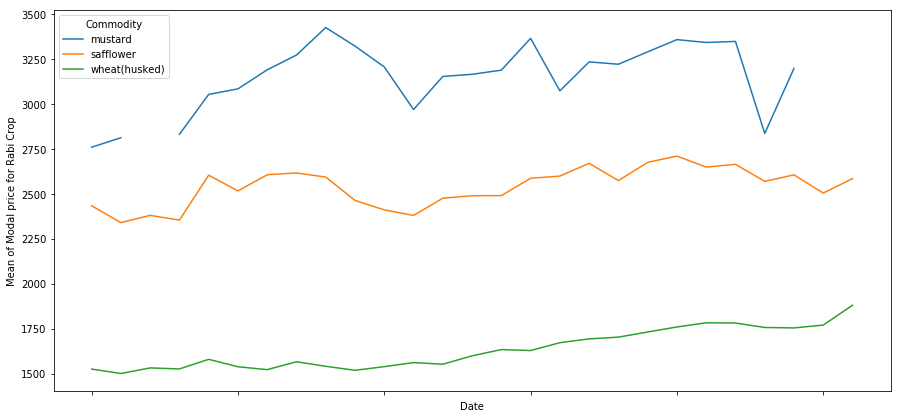

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
rabi.groupby(['date','Commodity']).mean()['modal_price'].unstack().plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Mean of Modal price for Rabi Crop')

Text(0,0.5,'Mean of Modal price for Kharif Crop')

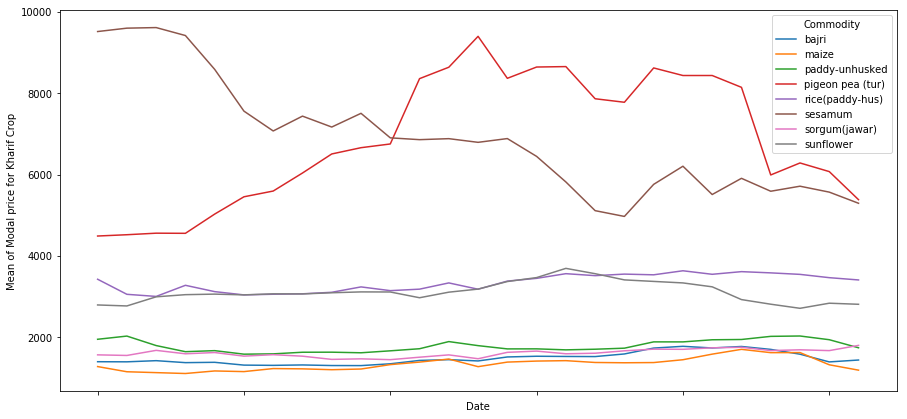

In [30]:
fig, ax = plt.subplots(figsize=(15,7))
kharif.groupby(['date','Commodity']).mean()['modal_price'].unstack().plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Mean of Modal price for Kharif Crop')